In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("student-scores (1).csv")
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [4]:
print(df.shape)
print(df.isnull().sum())
print(df.info())
print(df.describe())

(2000, 17)
id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-nul

In [5]:
print(df.duplicated().sum())


0


No duplicate row found <br>
No Null value present <br>
`Id` coloum needs to be dropped


In [6]:
df = df.drop(columns=['id' ,'first_name','last_name','email'])

In [7]:
score_cols = ['math_score','history_score','physics_score',
              'chemistry_score','biology_score','english_score','geography_score']
df['total_score'] = df[score_cols].sum(axis=1)

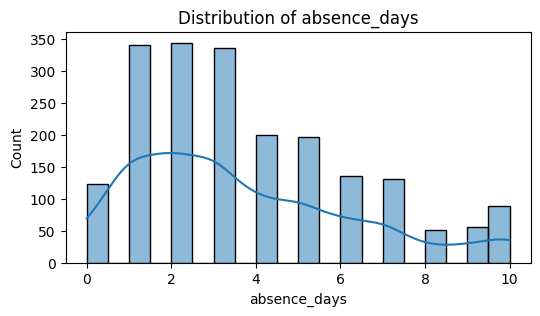

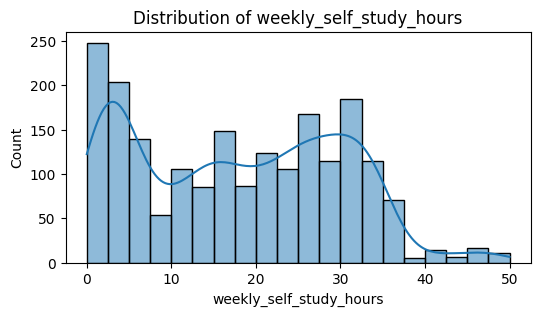

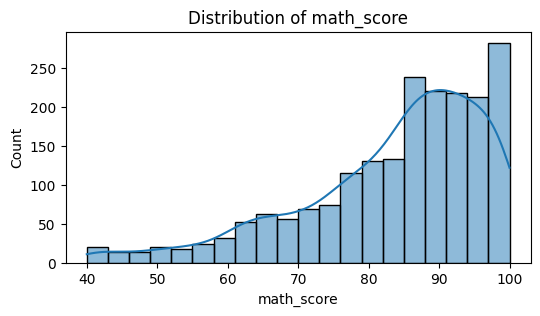

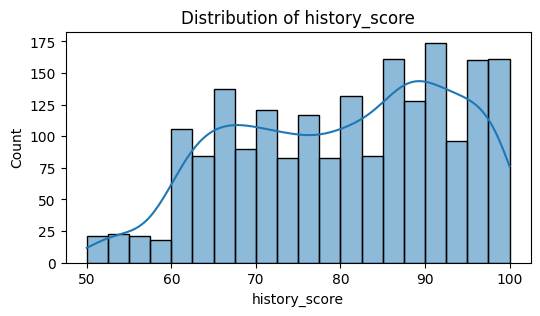

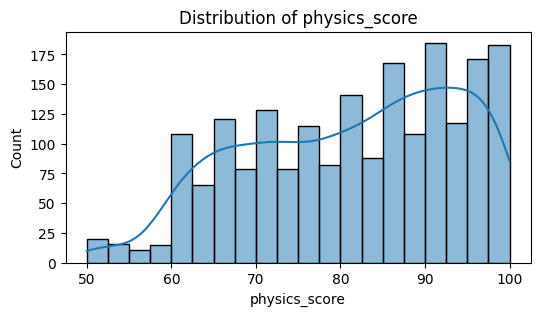

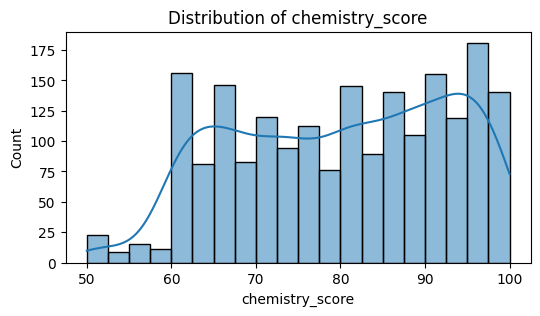

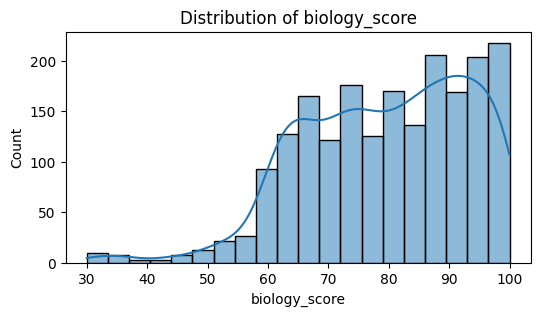

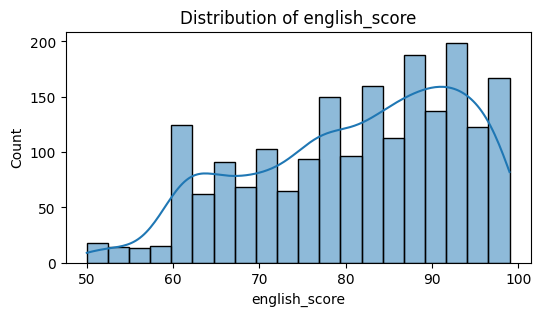

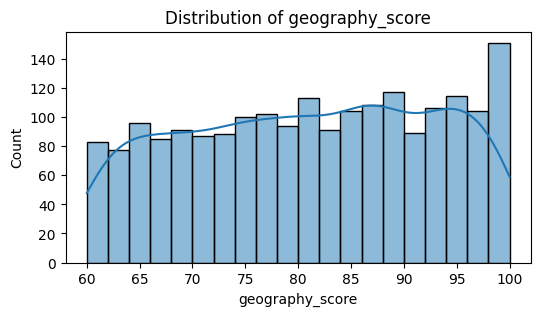

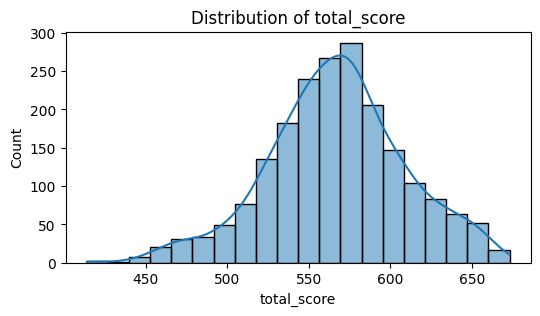

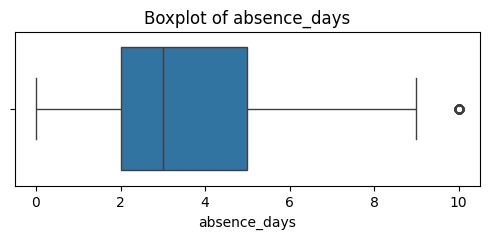

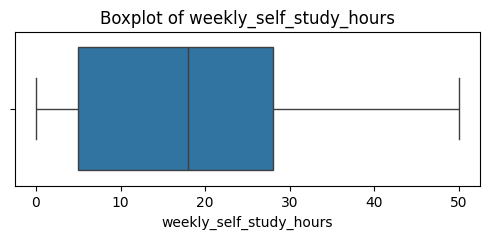

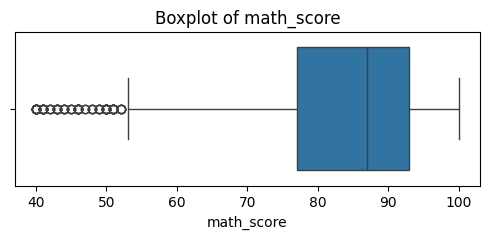

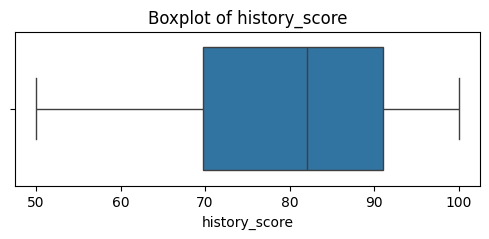

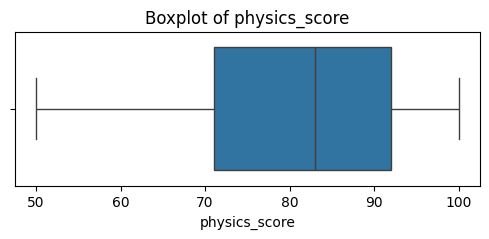

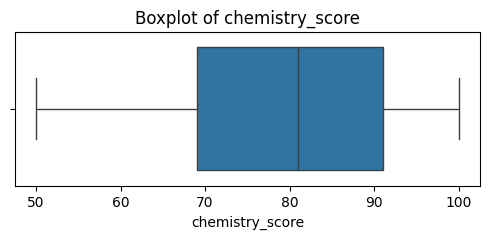

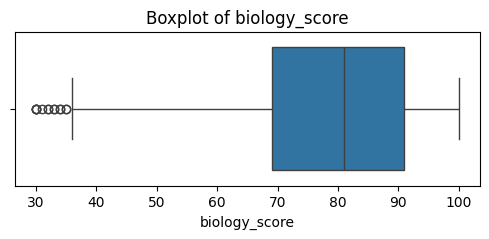

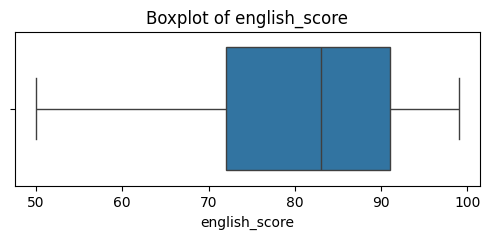

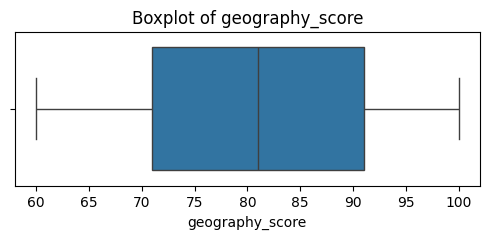

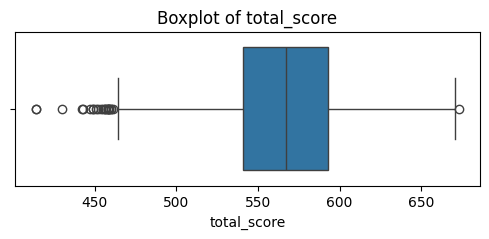

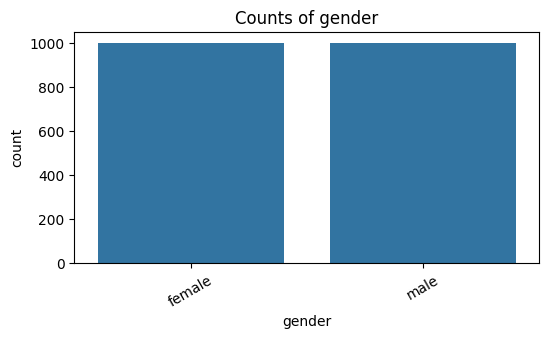

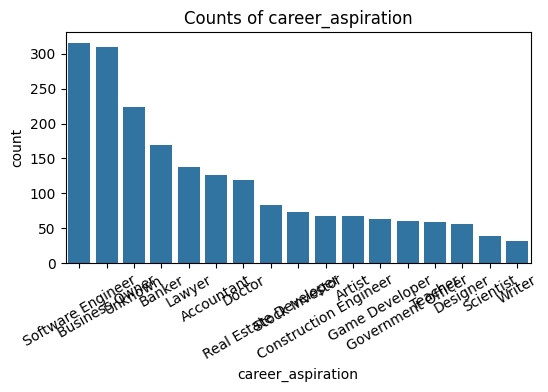

In [7]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

# hist
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

# box plot
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# bar graph
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=30)
    plt.show()


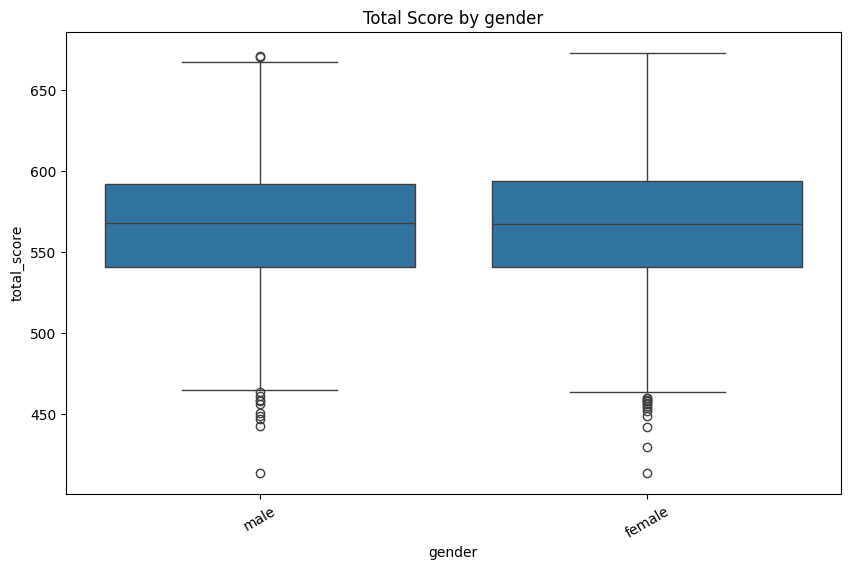

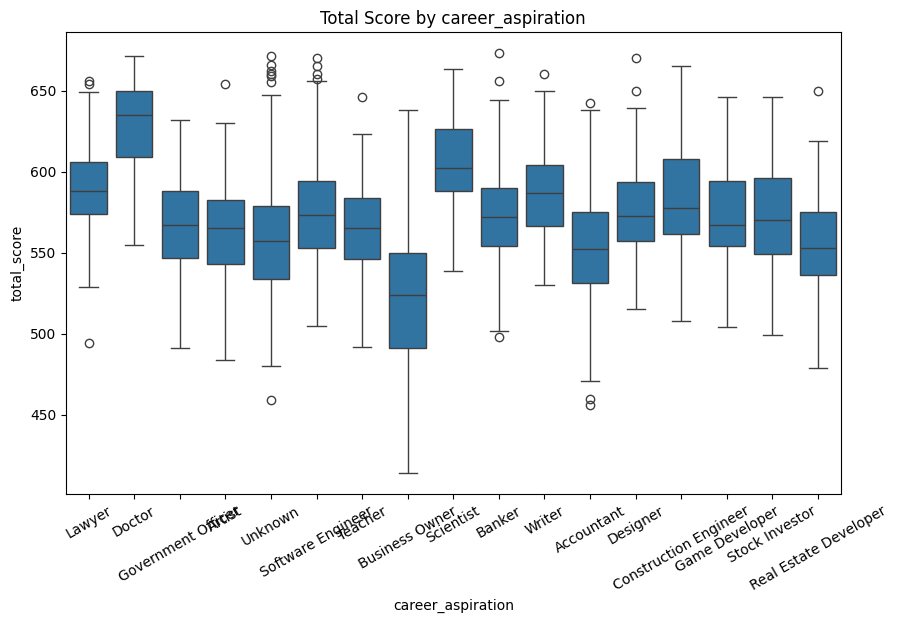

In [8]:
score_cols = ['math_score','history_score','physics_score',
              'chemistry_score','biology_score','english_score','geography_score']

for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=col, y='total_score')
    plt.title(f"Total Score by {col}")
    plt.xticks(rotation=30)
    plt.show()


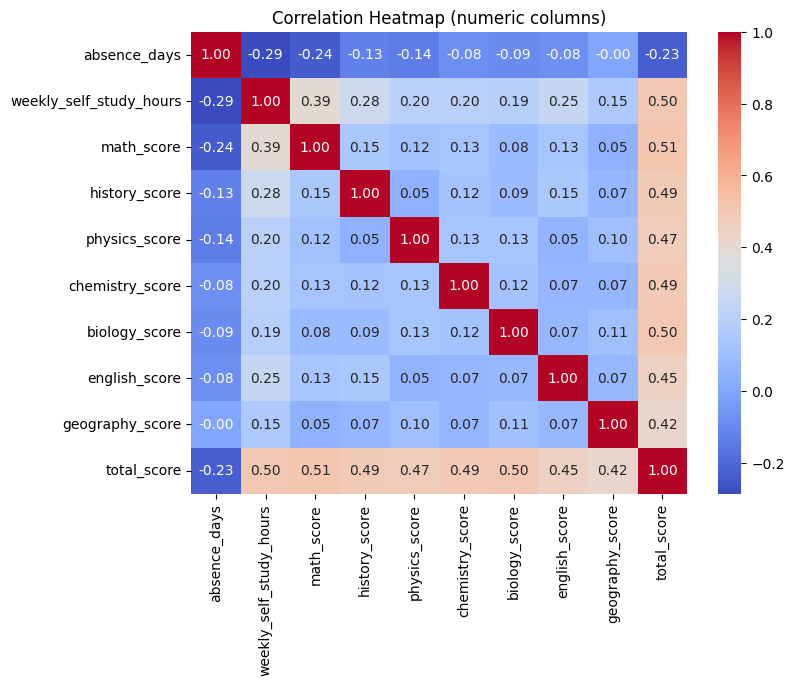

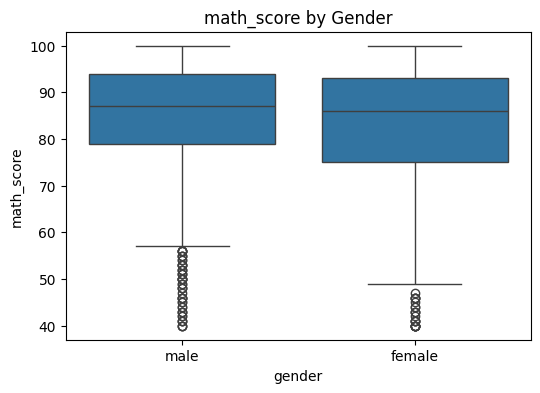

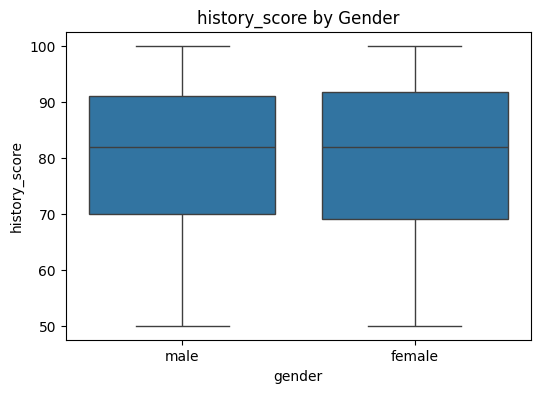

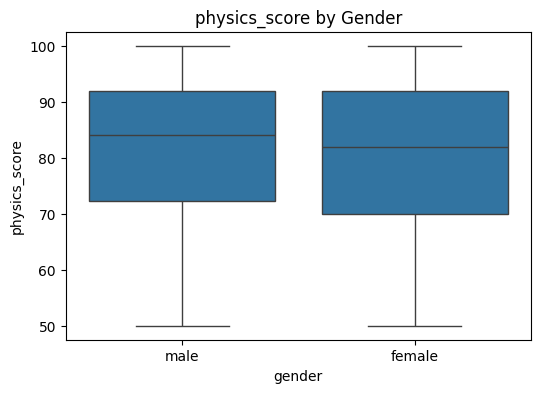

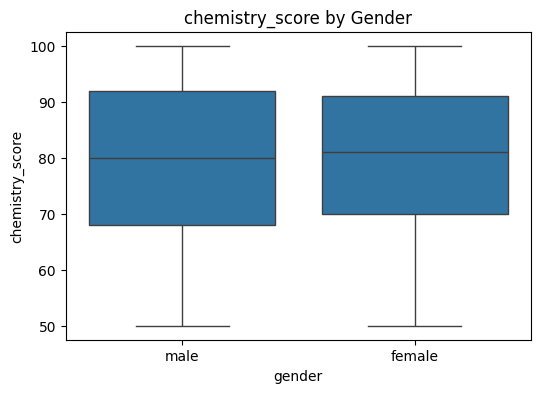

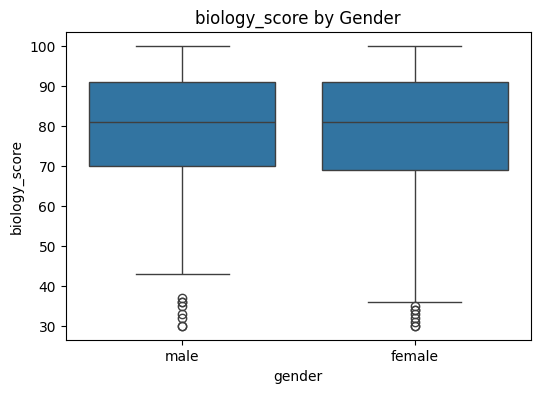

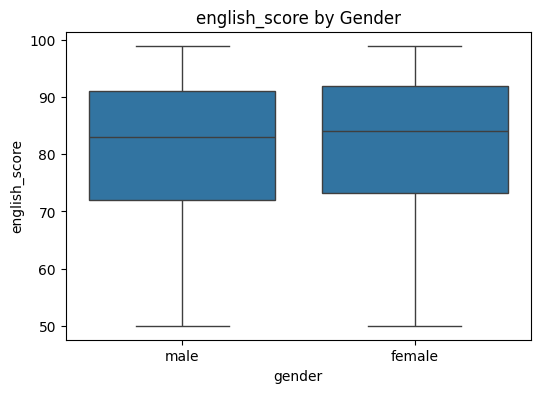

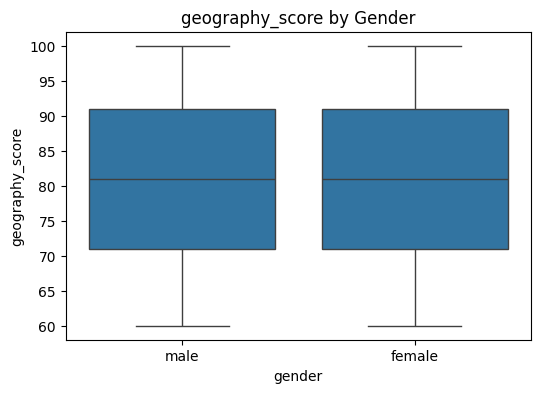

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (numeric columns)")
plt.show()


#  gender vs scores
for col in score_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="gender", y=col)
    plt.title(f"{col} by Gender")
    plt.show()



### from the above Analysis we can infer that the data have some outliers <br>
but they are geniune cases so we cannt drop them

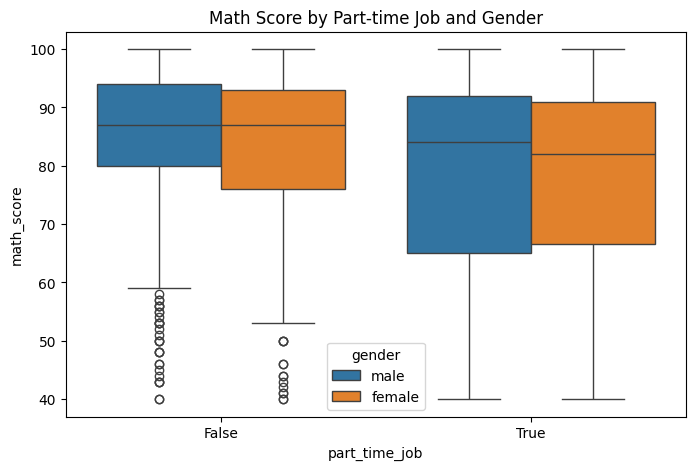

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='part_time_job', y='math_score', hue='gender')
plt.title("Math Score by Part-time Job and Gender")
plt.show()


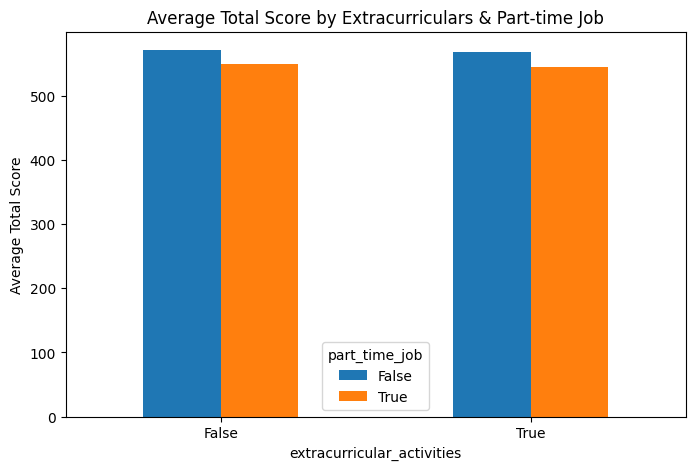

In [11]:
grouped = df.groupby(['extracurricular_activities','part_time_job'])['total_score'].mean().unstack()

grouped.plot(kind='bar', figsize=(8,5))
plt.ylabel("Average Total Score")
plt.title("Average Total Score by Extracurriculars & Part-time Job")
plt.xticks(rotation=0)
plt.show()


### 
by the above graphs we can see that having a `part time job` did not aftter `total score` 

## Insights from the data
1. No missing or duplicate data; dataset is clean.

2. Some outliers exist (study hours, scores), but appear genuine, not errors.

3. Gender-based variation: score distributions differ slightly, but not strongly.

4. Part-time jobs do not significantly reduce average scores.

5. Extracurricular + part-time job combination: students in both perform slightly worse in total_score.

6. Strong correlation among science subjects (physics, chemistry, biology), showing consistent performance trends.

In [8]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521


In [21]:
df[df['gender']=='male'].shape[0]

998

In [23]:
df[df['gender']=='female'].shape[0]

1002

In [ ]:
#find more insights
#use more type of graoghs
# reduce faltu ke graoghs
#documentation better with numbers
